# MLP - perceptron multicamadas

## Questão 56
Usar o método de classificação Multi Layer Perceptron (MLP) usando a biblioteca de Machine Learning da OpenCv. Deve-se fazer com os métodos Hold Out e Leave One Out. Tudo deve ser feito utilizando a estrutura Mat da OpenCv. Faça os testes com no mínimo três topologias distintas da Rede Neural usada.

In [1]:
import pandas as pd
import csv
from sklearn.neural_network import MLPClassifier

In [2]:

def hold_out(df, train_size, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Split the data into train and test
    X_train = data[:int(train_size*len(data))]
    X_test = data[int(train_size*len(data)):]

    # Get the correspondent labels to each feature vector
    y_train = [int(x[-1]) for x in X_train]
    y_test = [int(x[-1]) for x in X_test]

    # Remove the labels from the train and test vectors
    X_train = [x[:-1] for x in X_train]
    X_test = [x[:-1] for x in X_test]

    return X_train, X_test, y_train, y_test


def leave_one_out(df, shuffle=True):

    # Shuffle the dataframe if the shuffle is set to true
    if shuffle:
        df = df.sample(frac=1).reset_index(drop=True)

    # Convert the rows of the dataframe into a list of lists
    data = []
    for row in df.iterrows():
        index, values = row
        data.append(values.tolist())

    # Create a list of lists, in which each iteration of leave one out will be stored
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    for i in range(len(data)):
        train = data.copy()
        train.remove(data[i])

        test = data[i]

        # Get the correspondent labels to each feature vector
        y_train.append([int(x[-1]) for x in train])
        y_test.append(int(test[-1]))

        # Remove the labels from the train and test vectors
        X_train.append([x[:-1] for x in train])
        X_test.append(test[:-1])

    return X_train, X_test, y_train, y_test


def read_data(file):
    # Load the features of a file in a dataframe
    return pd.read_csv(file, sep=',', header=None)

https://skymind.ai/wiki/multilayer-perceptron


## Perceptron Multicamadas


compreender a terminologia que será muito útil quando estivermos desenvolvendo nosso modelo, estudando a Arquitetura das Redes Neurais. Suponha que tenhamos a rede abaixo:

 


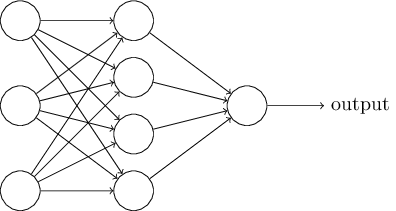
 

A camada mais à esquerda nesta rede é chamada de camada de entrada e os neurônios dentro da camada são chamados de neurônios de entrada. A camada mais à direita ou a saída contém os neurônios de saída ou, como neste caso, um único neurônio de saída. A camada do meio é chamada de camada oculta, já que os neurônios nessa camada não são entradas ou saídas. O termo “oculto” talvez soe um pouco misterioso – a primeira vez que ouvi o termo, pensei que devesse ter algum significado filosófico ou matemático profundo – mas isso realmente não significa nada mais do que “uma camada que não é entrada ou saída”. A rede acima tem apenas uma única camada oculta, mas algumas redes possuem múltiplas camadas ocultas. Por exemplo, a seguinte rede de quatro camadas tem duas camadas ocultas:

 
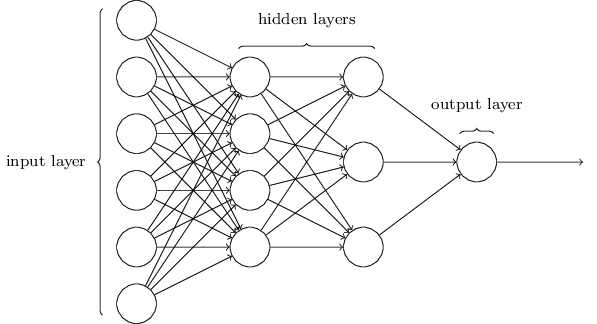


 
Tais redes de camadas múltiplas são chamados de Perceptrons Multicamadas ou MLPs (Multilayer Perceptrons), ou seja, uma rede neural formada por Perceptrons (embora na verdade seja uma rede de neurônios sigmóides, como veremos mais adiante).


### Pesos Sinapticos
O primeiro passo do algoritmo de retropropagação é a inicialização dos pesos da rede. Como normalmente não temos nenhuma informação sobre os pesos da rede, um método muito utilizado é inicializar os pesos aleatoriamente, com distribuição uniforme sobre um pequeno intervalo em torno do zero.

### Algoritmo de retropropagação
O algoritmo de retropropagação de erro, é um algoritmo utilizado no treinamento de redes neurais multicamadas, e consiste em dois passos de computação: o processamento direto e o processamento reverso.

No processamento direto, uma entrada é aplicada à rede neural e seu efeito é propagado pela rede, camada a camada. Durante o processamento direto, os pesos da rede permanecem fixos.

No processamento reverso, um sinal de erro calculado na saída da rede é propagado no sentido reverso, camada a camada, e ao final deste processo os pesos são ajustados de acordo com uma regra de correção de erro. 


### Propagação de sinal na rede
O algoritmo de retropropagação segue os seguintes passos:

1.     Inicialização. Inicialize os pesos da rede aleatoriamente ou segundo algum método.

2.     Processamento direto. Apresente um padrão à rede. Compute as ativações de todos os neurônios da rede e então calcule o erro.

3.     Passo reverso. Calcule os novos pesos para cada neurônio da rede, no sentido retroativo (isto é, da saída para a entrada), camada a camada.

4.     Teste de parada. Teste o critério de parada adotado. Se satisfeito, termine o algoritmo;

5.     senão volte ao passo 2.

O treinamento das redes MLP com backpropagation pode demandar um tempo de treinamento longo.

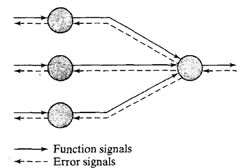

### Aprendizado
Uma rede neural aprende através de um processo iterativo de ajuste de seus pesos sinápticos. O processo de aprendizagem segue a seguinte sequência:

1.      a rede neural é estimulada pelo ambiente de informação;

2.      a estrutura interna da rede é alterada como resultado do estímulo;

3.      devido às alterações que ocorreram em sua estrutura interna, a rede tem modificada sua resposta aos estímulos do ambiente.

### Aprendizado Supervisionado
Este tipo de aprendizado é caracterizado pela presença de um “professor” externo, que tem a função de fornecer a resposta desejada durante o processo de aprendizado. A diferença entre a resposta desejada e a resposta observada na saída é denominada sinal de erro, e de acordo com esse erro, os parâmetros da rede são ajustados.

O objetivo do procedimento de aprendizado por correção de erro é ajustar os parâmetros da rede de modo que a resposta observada se aproxime da resposta desejada. 


In [9]:
    # Read the file with the features to classify
filename = 'features.txt'
features = read_data(filename)

    # Split the database using hold out
X_train, X_test, y_train, y_test = hold_out(features, train_size=0.9)

    # Create a mlp object (Change the hidden_layer parameters to change the topology of the model)
mlp = MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=3000)

    # Train the model
mlp.fit(X_train, y_train)

    # Evaluate in the test data
predictions = mlp.predict(X_test)

    # Convert the results to a list
predictions = list(predictions)

    # Calculates the accuracy using hold out
count = 0
for x, y in zip(y_test, predictions):
        if x == y:
            count += 1

accuracy = count/len(y_test)
print('Accuracy using hold out: {:.4f}'.format(accuracy))

    # Save the true and the predicted labels to use in question 59 and 60
with open('true_and_predict_56.csv', 'w') as outfile:
        rows = [y_test, predictions]
        writer = csv.writer(outfile, delimiter=',')
        writer.writerows(rows)

    # Split the database using leave one out
X_train, X_test, y_train, y_test = leave_one_out(features)

    # Apply mlp
print('[INFO] Starting leave one out training...')
count = 0
sample_count = 0
for train_set, test_set, label_train, label_test in zip(X_train, X_test, y_train, y_test):
        print('[INFO] Training sample {}/{}'.format(sample_count+1, len(y_train)))
        sample_count += 1

            # Create a mlp object (Change the hidden_layer parameters to change the topology of the model)
        mlp = MLPClassifier(hidden_layer_sizes=(5, 3), max_iter=3000)

            # Train the model
        mlp.fit(train_set, label_train)

            # Evaluate in the test data
        new_list = []
        new_list.append(test_set)
        prediction = mlp.predict(new_list)

        if prediction == label_test:
            count += 1

accuracy = count / len(y_test)

print('Accuracy using leave one out: {:.4f}'.format(accuracy))

Accuracy using hold out: 0.9375
[INFO] Starting leave one out training...
[INFO] Training sample 1/473
[INFO] Training sample 2/473
[INFO] Training sample 3/473
[INFO] Training sample 4/473
[INFO] Training sample 5/473
[INFO] Training sample 6/473
[INFO] Training sample 7/473
[INFO] Training sample 8/473
[INFO] Training sample 9/473
[INFO] Training sample 10/473
[INFO] Training sample 11/473
[INFO] Training sample 12/473
[INFO] Training sample 13/473
[INFO] Training sample 14/473
[INFO] Training sample 15/473
[INFO] Training sample 16/473
[INFO] Training sample 17/473
[INFO] Training sample 18/473
[INFO] Training sample 19/473
[INFO] Training sample 20/473
[INFO] Training sample 21/473
[INFO] Training sample 22/473
[INFO] Training sample 23/473
[INFO] Training sample 24/473
[INFO] Training sample 25/473
[INFO] Training sample 26/473
[INFO] Training sample 27/473
[INFO] Training sample 28/473
[INFO] Training sample 29/473
[INFO] Training sample 30/473
[INFO] Training sample 31/473
[INFO

[INFO] Training sample 267/473
[INFO] Training sample 268/473
[INFO] Training sample 269/473
[INFO] Training sample 270/473
[INFO] Training sample 271/473
[INFO] Training sample 272/473
[INFO] Training sample 273/473
[INFO] Training sample 274/473
[INFO] Training sample 275/473
[INFO] Training sample 276/473
[INFO] Training sample 277/473
[INFO] Training sample 278/473
[INFO] Training sample 279/473
[INFO] Training sample 280/473
[INFO] Training sample 281/473
[INFO] Training sample 282/473
[INFO] Training sample 283/473
[INFO] Training sample 284/473
[INFO] Training sample 285/473
[INFO] Training sample 286/473
[INFO] Training sample 287/473
[INFO] Training sample 288/473
[INFO] Training sample 289/473
[INFO] Training sample 290/473
[INFO] Training sample 291/473
[INFO] Training sample 292/473
[INFO] Training sample 293/473
[INFO] Training sample 294/473
[INFO] Training sample 295/473
[INFO] Training sample 296/473
[INFO] Training sample 297/473
[INFO] Training sample 298/473
[INFO] T

/home/Mariana/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[INFO] Training sample 378/473
[INFO] Training sample 379/473
[INFO] Training sample 380/473
[INFO] Training sample 381/473
[INFO] Training sample 382/473
[INFO] Training sample 383/473
[INFO] Training sample 384/473
[INFO] Training sample 385/473
[INFO] Training sample 386/473
[INFO] Training sample 387/473
[INFO] Training sample 388/473
[INFO] Training sample 389/473
[INFO] Training sample 390/473
[INFO] Training sample 391/473
[INFO] Training sample 392/473
[INFO] Training sample 393/473
[INFO] Training sample 394/473
[INFO] Training sample 395/473
[INFO] Training sample 396/473
[INFO] Training sample 397/473
[INFO] Training sample 398/473
[INFO] Training sample 399/473
[INFO] Training sample 400/473
[INFO] Training sample 401/473
[INFO] Training sample 402/473
[INFO] Training sample 403/473
[INFO] Training sample 404/473
[INFO] Training sample 405/473
[INFO] Training sample 406/473
[INFO] Training sample 407/473
[INFO] Training sample 408/473
[INFO] Training sample 409/473
[INFO] T